# Aula 2 - Machine Learning Com Python

## Análise Exploratória de Dados
### Case Spotify - Base de dados do Rolling Stones

As colunas (características) neste conjunto de dados são:

- **`nome`:** o nome da música
- **`album`:** o nome do álbum
- **`release_date`:** o dia, mês e ano em que o álbum foi lançado
- **`número da faixa`:** a ordem em que a música aparece no álgum
- **`id`:** o id do Spotify para a música
- **`uri`:** o uri do Spotify para a música
- **`acústica`:** uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.
- **`danceability`:** descreve o quanto uma faixa é adequada para dancçar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançavel e 1,0 é o mais dançavel.
- **`energia`:** a energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, _death metal_ tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala. Os recursos perceptivos que contribuem para esse atributo incluem faixa dinâmica, sonoridade percebida, timbre, taxa de início e entropia geral.
- **`instrumentless`:** prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da instrumentalidade estiver de 1.0. maior a probabilidade de a faixa **não** conter nenhum conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior conforme o valor se aproxima de 1,0.
- **`vivacidade`:** detecta presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.
- **`loudness`:** o volume geral de uma faixa em decibéis (dB). os valores de voluma são calculados em média em toda a faixa e são úteis para comparar o colume relativo das faixas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores, geralmente, varia entre -60 e 0 dB.
- **`locução`:** detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, tal show, livro de áudio, poesia etc), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas interiamente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala.
- **`tempos`:** o tempo geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, é tempo e a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.
- **`valência`:** uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, zangadas)
- **`popularidade`:** a popularidade da música de 0 a 100
- **`duration_ms`:** a duração da faixa em milissegundos

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\cqueiroz\OneDrive - Capgemini\Documents\2. docsCamila\repos2\machine_learning_and_time_series\bases\dataset_rolling_stones.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [4]:
df.shape

(1610, 15)

In [5]:
# printa data da primeira música lançada
print('Data Inicial: ', df['release_date'].min())

Data Inicial:  1964-04-16 00:00:00


In [6]:
# printa última data de lançamento de música
print('Data final: ', df['release_date'].max())

Data final:  2022-06-10 00:00:00


In [7]:
# verifica se tem dados nulos dentro da base
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
# verifica dados duplicados
df.duplicated().sum()

6

In [9]:
# verifica quais são os dados duplicados
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


O que está duplicado, é o nome do álbum, por isso, não pode ser deletado.

In [10]:
# puxa a estatística descritiva do dataframe
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [11]:
# transforma milissegundos em minutos
df['duracao_minutos'] = df['duration_ms'] / 60000 # cria uma coluna nova que transforma a coluna de milissegundos para minutos
df.head()


,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [12]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


A minutagem média passa de milissegundos para 4,29 minutos na última coluna (em média).

In [13]:
# agrupa as músicas por album e mostra a média de minutos por album
df.groupby('album')['duracao_minutos'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_minutos, Length: 90, dtype: float64

In [14]:
# criando dataframe que agrupa os alguns e ordena as musicas por tamanho de musica (do maior para o menor)
df_maior_duracao_musica = df.groupby('album')['duracao_minutos'].mean().sort_values(ascending=False)
df_maior_duracao_musica

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duracao_minutos, Length: 90, dtype: float64

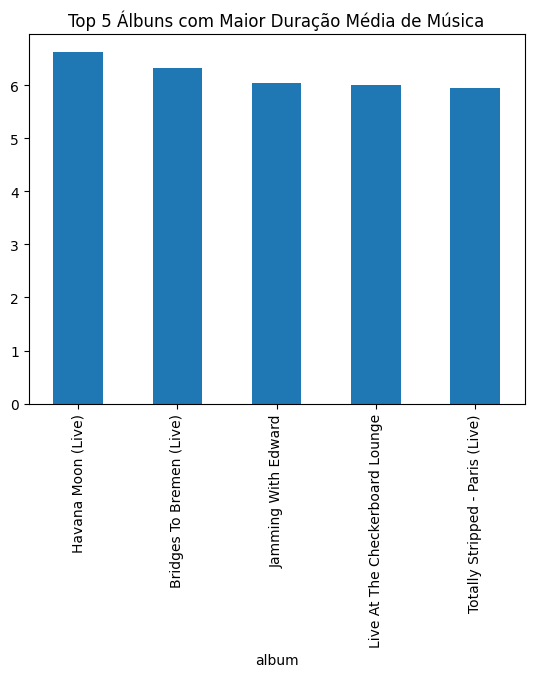

In [15]:
# cria gráfico de barras com top 5 músicas mais longas
df_maior_duracao_musica.head(5).plot(kind='bar')
plt.xlabel=('Álbuns')
plt.ylabel=('Média de Duração das Músicas')
plt.title('Top 5 Álbuns com Maior Duração Média de Música')
plt.show()

In [16]:
# cria variável com top 10 albuns com maior quantidade de músicas
top_albuns = df['album'].value_counts().head(10)
top_albuns

album
Voodoo Lounge Uncut (Live)         56
Honk (Deluxe)                      47
Live Licks                         46
Tattoo You (Super Deluxe)          46
Some Girls (Deluxe Version)        44
Goats Head Soup (Deluxe)           37
Flashpoint                         34
Sticky Fingers (Super Deluxe)      33
On Air (Deluxe)                    32
Live At The Checkerboard Lounge    32
Name: count, dtype: int64

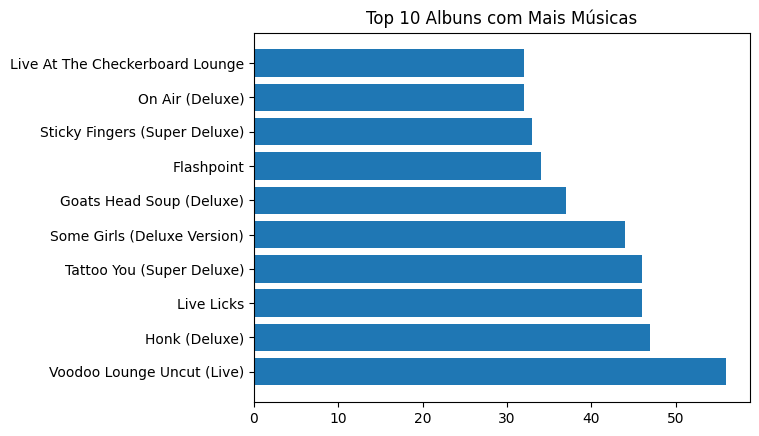

In [17]:
# cria o gráfico de barras em formato diferente do padrão matplotlib
plt.barh(top_albuns.index, top_albuns.values)
plt.title('Top 10 Albuns com Mais Músicas')
plt.show()

#### Analisando a popularidade da banda na última década

In [18]:
# cria variável que traz as músicas lançadas na última década
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]
df_ultima_decada.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos
189,(I Can't Get No) Satisfaction - Live,Bridges To Buenos Aires (Live),2019-11-08,1,0.0215,0.294,0.986,0.050300,0.588,-5094.0,0.2060,142591.00,0.0918,24,320440,5.340667
190,Let's Spend The Night Together - Live,Bridges To Buenos Aires (Live),2019-11-08,2,0.1080,0.487,0.983,0.000030,0.944,-4454.0,0.2510,143.53,0.2870,24,245493,4.091550
191,Flip The Switch - Live,Bridges To Buenos Aires (Live),2019-11-08,3,0.0827,0.335,0.972,0.003720,0.931,-4931.0,0.2080,152321.00,0.3370,19,243906,4.065100
192,Gimme Shelter - Live,Bridges To Buenos Aires (Live),2019-11-08,4,0.0997,0.438,0.957,0.005540,0.774,-5064.0,0.1350,119245.00,0.2720,25,397386,6.623100
193,Sister Morphine - Live,Bridges To Buenos Aires (Live),2019-11-08,5,0.1050,0.246,0.913,0.000478,0.969,-5153.0,0.0921,80371.00,0.3320,19,379800,6.330000


In [19]:
# cria variável com agrupamento de album por popularidade e ordenado do maior para o menor - TOP 10
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)
df_por_album

album
Honk (Deluxe)                      1232
Voodoo Lounge Uncut (Live)          654
On Air (Deluxe)                     573
Live At The Checkerboard Lounge     482
Havana Moon (Live)                  445
Bridges To Buenos Aires (Live)      433
Blue & Lonesome                     419
Bridges To Bremen (Live)            396
Some Girls: Live In Texas '78       344
Ladies & Gentlemen (Live)           343
Name: popularity, dtype: int64

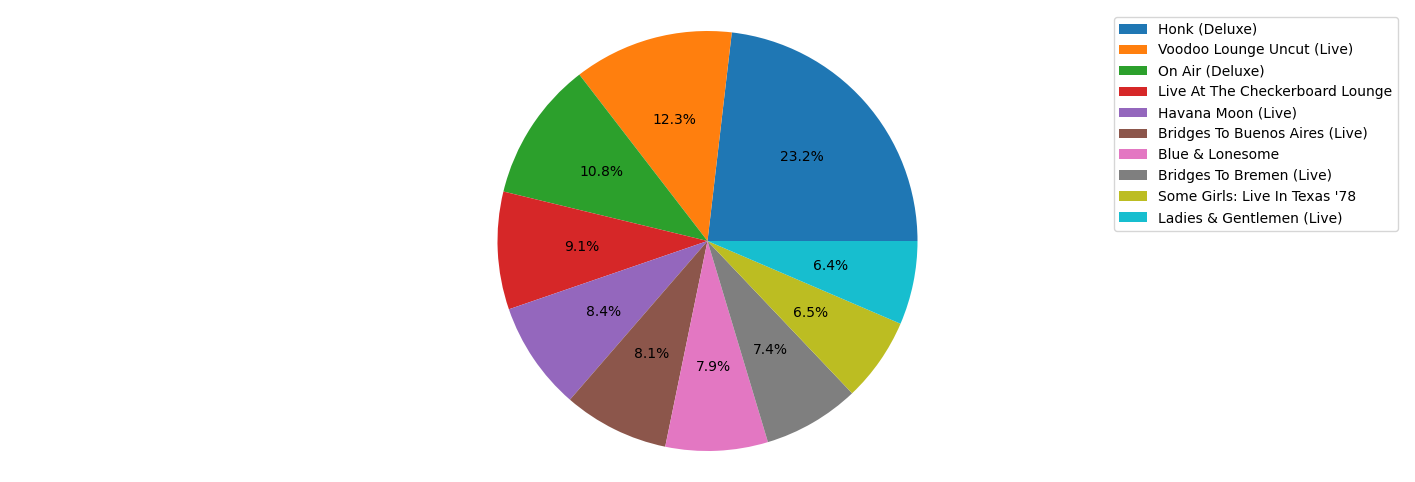

In [20]:
# cria variável que calcula a porcentagem de popularidade dos top 10
# cria variável de labels
# cria variável de size
total_popularidade = df_por_album.sum()

df_porcentagem = df_por_album / total_popularidade * 100

labels = df_porcentagem.index.tolist()
size = df_porcentagem.values.tolist()

# estrutura do gráfico
figura, grafico = plt.subplots(figsize = (18,6))
grafico.pie(size, autopct='%1.1f%%')
grafico.axis('equal')
plt.title = ('Porcentagem de Popularidade de Álguns na Última Década (Top 10 Álguns)')
plt.legend(labels, loc = 'best')
plt.show()

#### Outliers

- São valores extremos na base seja para cima ou para baixo

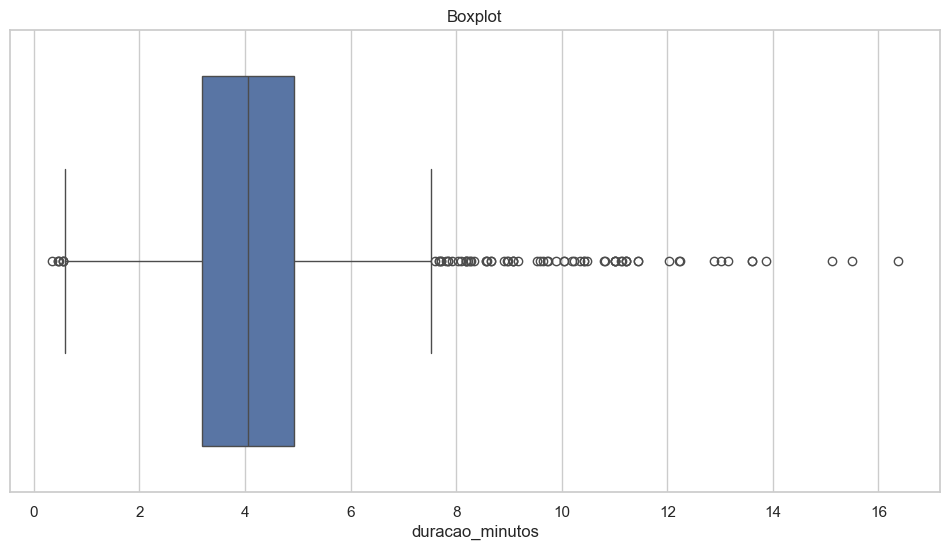

In [21]:
# cria o boxplot para ajudar na identificação dos outliers
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize = (12,6))
sns.boxplot(x = 'duracao_minutos', data = df)
axes.set_title('Boxplot')
plt.show()

- O boxplot ajuda a visualizar também a distribuição de dados
    - Onde está o retângulo azul, é a maior concentração de dados: neste caso a média de range de duração das músicas vai em torno de 3 a 6 minutos
    - Dentro da caixa azul, há uma linha que divide a caixa, ela representa a média -> média de 4 minutos por música
    - Os pontinhos pretos são os outliers. Neste gráfico temos outliers para cima e para baixo
        - Quanto mais pontinhos pretos no gráfico, maior é a quantidade de dados fora do padrão
- Tirar ou não tirar os outliers da base, dependem da necessidade de análise. Não é uma regra que diz que outlier precisa ser tirado.

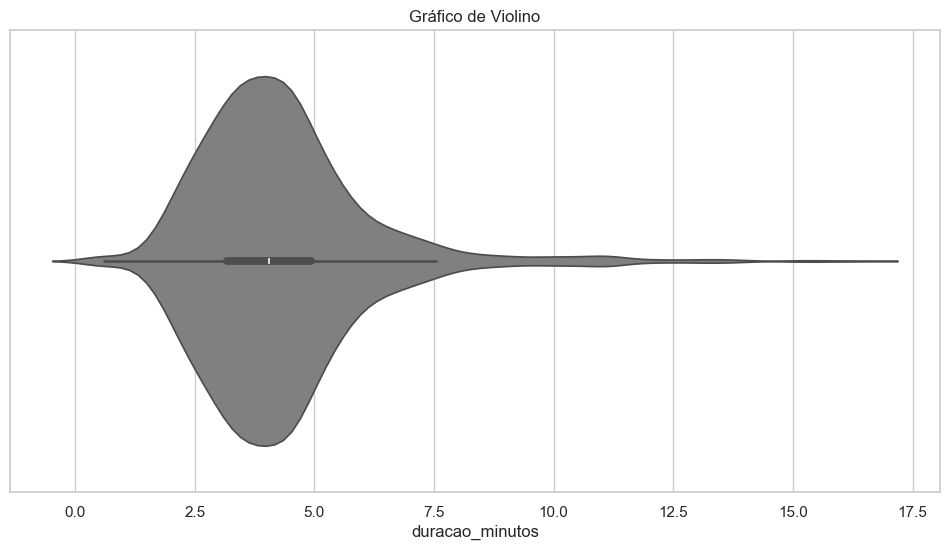

In [22]:
# criação de um gráfico violino
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x = 'duracao_minutos', data = df, color = 'gray')
axes.set_title('Gráfico de Violino')
plt.show()

- Este gráfico traz uma representação diferente do boxplot
    - Aqui também, a maior concentração de dados, é onde tem o corpo maior em cinza
    - Os outliers são representados na "linha" mais fina do gráfico

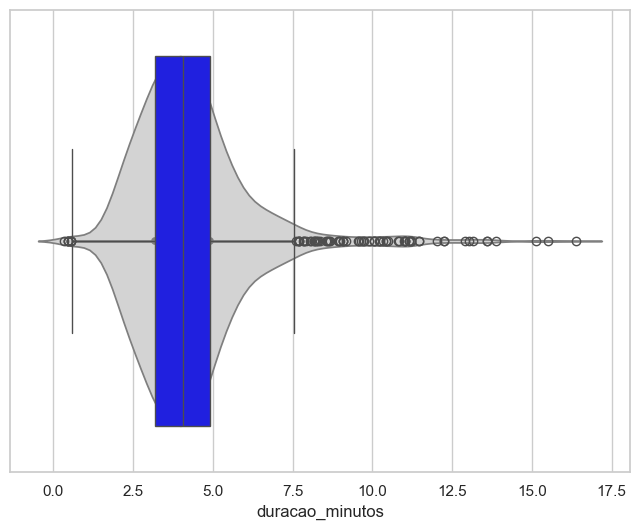

In [23]:
# juntando os dois gráficos
fig, ax = plt.subplots(figsize = (8,6))

sns.violinplot(x = 'duracao_minutos', data = df, ax = ax, color = 'lightgray')
sns.boxplot(x = 'duracao_minutos', data = df, ax = ax, whis=1.5, color = 'blue')

axes.set_title('Visualização Violino & Boxplot')
plt.show()

In [24]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [25]:
# verificar (através de função) se a músca é ao vivo ou não, baseado no liveness (qto mais próximo de 1, é ao vivo)
def classifica_musica_ao_vivo(df):
    if df['liveness'] >= 0.8:
        return True
    else:
        return False

In [26]:
#cria uma coluna ao vivo e aplica a função para classificar o que é ao vivo ou não)
df['ao_vivo'] = df.apply(classifica_musica_ao_vivo, axis = 1)
df

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False


In [27]:
# agrupa música ao vivo e musica nao ao vivo
df.groupby('ao_vivo')['ao_vivo'].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [28]:
# cria um dataframe para cada grupo (ao vivo e não ao vivo)
df_gravado_em_estudio = df[df['ao_vivo'] == False]
df_show_ao_vivo = df[df['ao_vivo'] == True]

In [29]:
df_gravado_em_estudio.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos,ao_vivo
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.12500,0.741,-5539.0,0.0915,101628.0,0.125,31,244293,4.071550,False
23,Honky Tonk Women - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,1,0.1620,0.430,0.901,0.01100,0.694,-6215.0,0.0450,112077.0,0.890,32,216546,3.609100,False
25,Hand Of Fate - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,3,0.0654,0.477,0.899,0.03760,0.727,-6189.0,0.0425,129991.0,0.805,29,267866,4.464433,False
26,Route 66 - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,4,0.0975,0.473,0.923,0.00157,0.722,-6204.0,0.0791,144625.0,0.792,30,193653,3.227550,False
28,Crazy Mama - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,6,0.0288,0.447,0.883,0.00554,0.726,-6266.0,0.0371,117604.0,0.556,29,299213,4.986883,False


In [30]:
df_show_ao_vivo.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [31]:
# calcula e printa média de músicas ao vivo
print('Média das músicas ao vivo: ', df_show_ao_vivo['duracao_minutos'].mean())

Média das músicas ao vivo:  5.088648962516734


In [32]:
# calcula e printa média de músicas ao vivo
print('Média das músicas em estúdio: ', df_gravado_em_estudio['duracao_minutos'].mean())

Média das músicas em estúdio:  3.940451363908873


Olhando para esses dados, é possível confirmar que os _outliers_ que apareceram nos gráficos acima, de fato existem. São as músicas de show ao vivo. Se fossem retirados, perderíamos todos dados de música ao vivo.

Utilizar o `loudness` para fazer análises com o Histograma.

- Histograma analisa distribuição de dados que são contínuos
- Dados contínuos são dados que não possuem limite definido, tem diversas variações.

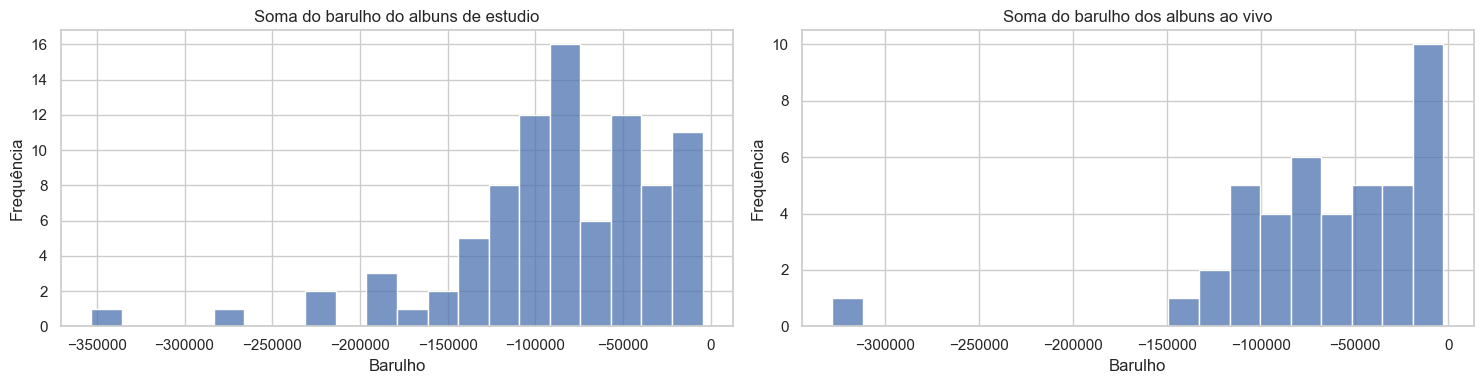

In [33]:
# cria dois novos datasets, agrupando por album e nível loudness
df_estudio = df_gravado_em_estudio.groupby('album')['loudness'].sum()
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum()

# criando os dois histogramas lado a lado
fig, axes = plt.subplots(1, 2, figsize = (15,4))

sns.histplot(data = df_estudio, bins = 20, ax = axes[0])
axes[0].set_title('Soma do barulho do albuns de estudio')
axes[0].set_xlabel('Barulho')
axes[0].set_ylabel('Frequência')

sns.histplot(data = df_ao_vivo, bins = 20, ax = axes[1])
axes[1].set_title('Soma do barulho dos albuns ao vivo')
axes[1].set_xlabel('Barulho')
axes[1].set_ylabel('Frequência')

#ajusta espaçamento entre os dados
fig.tight_layout()
plt.show()


Gráfico de densidade (abaixo), também é utilizado para analisar a distribuição dos dados.

TypeError: 'str' object is not callable

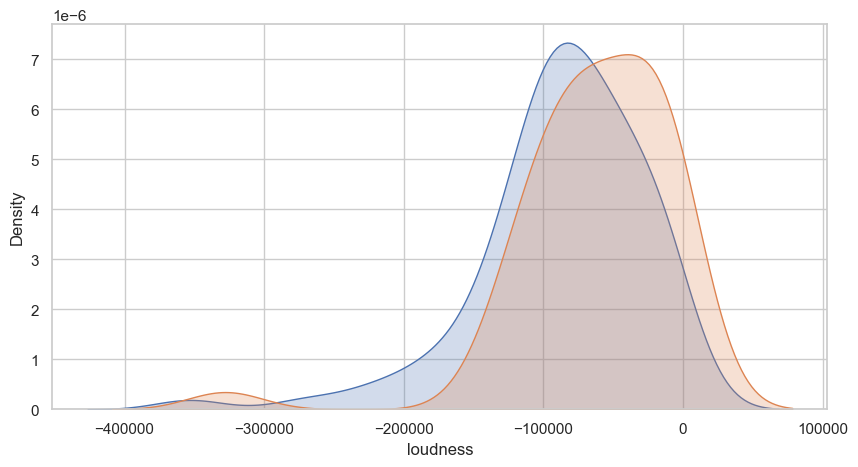

In [34]:
# o gráfico vai ser plotado um dataframe sobre o outro para ajudar a análise
plt.figure(figsize = (10, 5))

sns.kdeplot(data = df_estudio, label = 'Álbuns de estudio', fill = True)
sns.kdeplot(data = df_ao_vivo, label = 'Álbuns ao vivo', fill = True)

plt.title('Distribuição do barulho dos albuns')
plt.xlabel('Barulho')
plt.ylabel('Densidade')
plt.legend()



- Estudio - azul
- vermelho - ao vivo

- Aparentemente, os albuns de estudio tem menos ruido que os albuns ao vivo

A comprovação dessa informação pode ser feito através da leitura estatística.

**TESTES DE HIPÓTESES**

In [ ]:
# utiliza o shapiro para testar hipótese de distribuição dos dados
from scipy.stats import shapiro # teste de normalidade dos dados

In [ ]:
stat, p = shapiro(df_estudio)
print('Soma do barulho dos álbuns de estudio: ')
print('Estatística de teste: {:.4f}, valor p: {}'.format(stat, p))

if p > 0.05:
    print('Não há evidência suficiente para rejeitar a hipótese de normalidade.')
else:
    print('A hipótese de normalidade é rejeitada.')

Soma do barulho dos álbuns de estudio: 
Estatística de teste: 0.8958, valor p: 3.2961810837730903e-06
A hipótese de normalidade é rejeitada.


In [ ]:
stat, p = shapiro(df_ao_vivo)
print('Soma do barulho dos álbuns ao vivo: ')
print('Estatística de teste: {:.4f}, valor p: {}'.format(stat, p))

if p > 0.05:
    print('Não há evidência suficiente para rejeitar a hipótese de normalidade.')
else:
    print('A hipótese de normalidade é rejeitada.')

Soma do barulho dos álbuns ao vivo: 
Estatística de teste: 0.7913, valor p: 2.35060091497093e-06
A hipótese de normalidade é rejeitada.


In [ ]:
# compara (ou não) que os dois datasets possuem distribuição semelhantes
from scipy.stats import mannwhitneyu

In [ ]:
stat, p = mannwhitneyu(df_estudio.sample(len(df_estudio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative = 'less')

print('Estatística de teste U: ', stat)
print('Valor p: ', p)

alpha = 0.05
if p < alpha:
    print('Diferença estatisticamente significante.')
else:
    print('Não há diferença estatísticamente significante.')


Estatística de teste U:  1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significante.


### Análise de Correlação

A valência é o parâmetro utilizado para identificar a positividade de uma música.

In [35]:
# criar média da valencia por album
media_por_album_valence = df.groupby('album')['valence'].mean().reset_index()

# cria coluna de média de valencia
media_por_album_valence = media_por_album_valence.rename(columns = {'valence' : 'valence_average'}) # renomeia a coluna valence para valence_average

# 0,6 >  == musica positiva
# 0,6 < == musica negativa
# cria condição que classifica a música de acordo com os parâmetros acima e cria uma nova coluna (sentimento) para armazenar essa classificação
media_por_album_valence['sentimento'] = ['positivo' if v > 0.6 else 'negativo' for v in media_por_album_valence['valence_average']]

# contabiliza o volume de musicas positivas e negativas
media_por_album_valence.groupby('sentimento')['sentimento'].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [42]:
# concatena dataframe original com media_por_album_valence
df_resultado_final = pd.merge(df, media_por_album_valence, on = 'album')
df_resultado_final.head(15)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos,ao_vivo,valence_average,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.00,0.1100,118001.00,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.00,0.0759,131455.00,0.3180,34,253173,4.219550,True,0.27117,negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.00,0.1150,130066.00,0.3130,34,263160,4.386000,True,0.27117,negativo
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.00,0.1930,132994.00,0.1470,32,305880,5.098000,True,0.27117,negativo
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.00,0.0930,130533.00,0.2060,32,305106,5.085100,True,0.27117,negativo
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.125000,0.741,-5539.00,0.0915,101628.00,0.1250,31,244293,4.071550,False,0.27117,negativo
6,Angie - Live,Licked Live In NYC,2022-06-10,7,0.5610,0.262,0.810,0.000003,0.972,-6851.00,0.0969,77.52,0.3940,31,245506,4.091767,True,0.27117,negativo
7,Let It Bleed - Live,Licked Live In NYC,2022-06-10,8,0.3170,0.413,0.971,0.000267,0.993,-5509.00,0.0873,128958.00,0.4840,30,313586,5.226433,True,0.27117,negativo
8,Midnight Rambler - Live,Licked Live In NYC,2022-06-10,9,0.4160,0.268,0.942,0.040800,0.959,-6018.00,0.1190,139452.00,0.2850,30,781173,13.019550,True,0.27117,negativo
9,Tumbling Dice - Live,Licked Live In NYC,2022-06-10,10,0.4010,0.310,0.944,0.075200,0.974,-5074.00,0.1280,119782.00,0.1880,29,333413,5.556883,True,0.27117,negativo


In [48]:
# cria matriz de correlação
df_resultado_final

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_minutos,ao_vivo,valence_average,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True,0.271170,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True,0.271170,negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True,0.271170,negativo
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True,0.271170,negativo
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True,0.271170,negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False,0.745583,positivo
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False,0.745583,positivo
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False,0.745583,positivo
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False,0.745583,positivo


In [51]:
# cria matriz de correlação
matriz_correlacao = df_resultado_final.corr(numeric_only = True)

correlacao_sentimento = matriz_correlacao['valence_average']

display(correlacao_sentimento)

track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_minutos    -0.309499
ao_vivo            -0.549736
valence_average     1.000000
Name: valence_average, dtype: float64

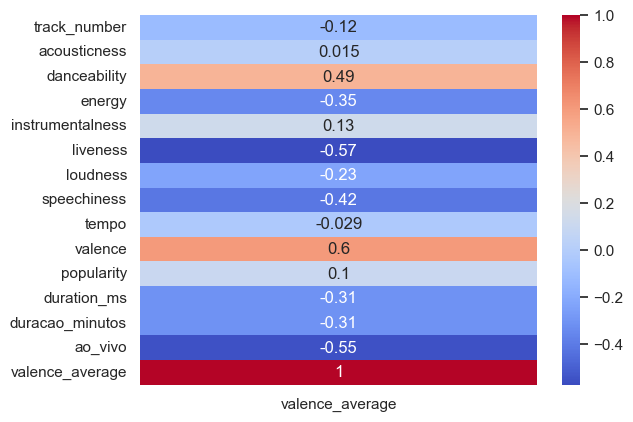

In [52]:
sns.heatmap(correlacao_sentimento.to_frame(), annot = True, cmap = 'coolwarm')
plt.show()

TypeError: 'str' object is not callable

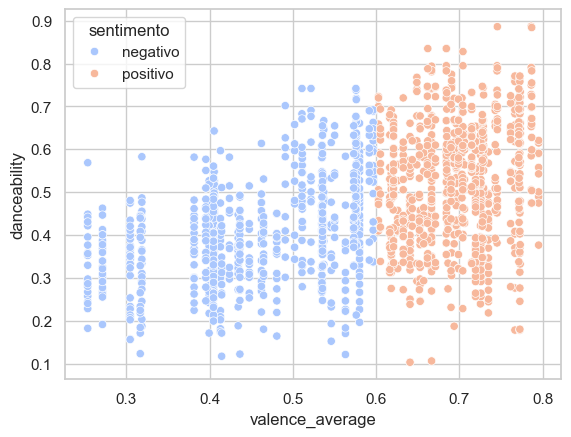

In [54]:
# cria um gráfico de dispersão
sns.scatterplot(x = 'valence_average', y = 'danceability', hue = 'sentimento', data = df_resultado_final, palette = 'coolwarm')
plt.xlabel('valence_average')
plt.ylabel('danceability')
plt.title('Relação entre valência média e a capacidade de dança das músicas')

plt.show()

TypeError: 'str' object is not callable

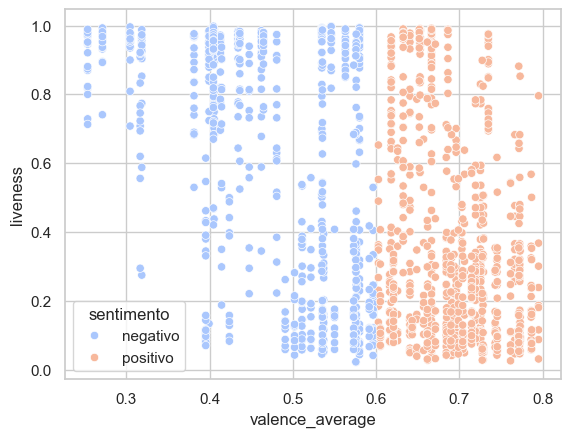

In [55]:
sns.scatterplot(x = 'valence_average', y = 'liveness', hue = 'sentimento', data = df_resultado_final, palette = 'coolwarm')
plt.xlabel('media valence')
plt.ylabel('liveness')
plt.title('Relação entre valência média e música ao vivo')
plt.show()